# Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from sklearn.utils import shuffle
vocab_size = 6000

from sklearn.linear_model import LinearRegression
import joblib
import tensorflow as tf


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def print_line():
    print(u'\u2550' * 50) 
    
def print_add():
    print('+' * 50)

# SPRINT - 1

## Task - 1

In [ ]:
# Reading a Dataset
def readfunction():
    # reading a file
    resume = pd.read_csv('data/UpdatedResumeDataSet.csv')
    print_line()
    print("File is read Sucessfully")
    print_add()
    print(resume.head())
    print_add()
    print_line()
    return resume 



In [ ]:
# Data visulizatio , to understand about the dataset
def Visulization(df):
    print("DATA VISULIZATION: ")
    print()
    print("Shape of Data Frame: ",df.shape)# check shape
    print_add()
    print("To check For NULL Values: ")
    print(df.isna().sum())# To check wether it countains any null value
    print_add()
    print()
    print("To Check for any Duplicate value: ", df.duplicated().sum())# To check wether it countains any duplicagte value
    print()
    print(df.describe())
    print_add()
    print(df['Category'].value_counts())# Check Unique values
    print_add()
    print(sns.countplot(y="Category", data=df))

## Task-2

In [ ]:
#pre-processing of data to remove special characters, hashtags, urls etc

def cleanResume(resumeText):

    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

def pre_processing(df):
    print("Before Pre-Processing")
    print_add()
    print(df['Resume'])
    print_line()
    df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
    print("After Pre-Processing")
    print_add()
    print(df['cleaned_resume'])


In [ ]:
# getting the most common word
def mostcommon_words(df):
    print_line()
    oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
    totalWords =[]
    Sentences = df['cleaned_resume'].values
    cleanedSentences = ""
    for i in range(len(df)):
        cleanedText = cleanResume(Sentences[i])
        cleanedSentences += cleanedText
        requiredWords = nltk.word_tokenize(cleanedText)
        for word in requiredWords:
            if word not in oneSetOfStopWords and word not in string.punctuation:
                totalWords.append(word)
    
    wordfreqdist = nltk.FreqDist(totalWords)
    mostcommon = wordfreqdist.most_common(50)
    print_add()
    print("Most common words: ")
    print()
    print(mostcommon)
    print_add()
    return cleanedSentences, wordfreqdist



In [ ]:
#Visualising most common words with Wordcloud
def wordcloud(cleanedSentences):
    print_line()
    print("Visulization of most common word: ")
    wordcloud = WordCloud(background_color='black',width=1600,height=800,).generate(cleanedSentences)
    fig = plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    fig.savefig("tag.png")
    print_line()
    plt.show()


In [ ]:
# wordfreqdist


In [ ]:
# Get features and labels from data and shuffle
def get_festures_Labels(df):
    print_line()
    print("Get features and labels from data: ")
    features = df['cleaned_resume'].values
    original_labels = df['Category'].values
    label = original_labels[:]

    for i in range(len(df)):
        label[i] = str(label[i])
        label[i] = str(label[i].lower())  # convert to lowercase
        label[i] = label[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens
        
    features, label = shuffle(features, label)
    print_add()
    print("Features: ")
    print()
    print(features[1])
    print_add()
    print("Label: ")
    print()
    print(label[1])
    print_line()
    return features, label



# SPRINT - 2

In [ ]:
# Split into train and test
def spliting_data(df,features, label):
    print_line()
    print("Sliting data In process")
    train_split = 0.8
    train_size = int(train_split * len(df))

    train_features = features[:train_size]
    train_labels = label[:train_size]

    test_features = features[train_size:]
    test_labels = label[train_size:]
    print_add()
    print("Sliting data successfully completed")
    print("train_features, train_labels, test_features, test_labels suceffuly generated")
    print_line()
    return train_features, train_labels, test_features, test_labels



In [ ]:
#tokenize features and labels

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

def tokenizing():
    # Tokenize feature data
    vocab_size = 6000
    oov_tok = '<>'
    print_line()
    print("Tokenize part has started")
    feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    feature_tokenizer.fit_on_texts(features)

    feature_index = feature_tokenizer.word_index
    
    train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)
    test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)
    print_add()
    print("Tokenize part has completed")
    print_line()
    return train_feature_sequences, test_feature_sequences, feature_tokenizer


In [ ]:
# Tokenize label data 
def Tokenize_label():
    label_tokenizer = Tokenizer(lower=True)
    label_tokenizer.fit_on_texts(label)

    label_index = label_tokenizer.word_index
    print(dict(list(label_index.items())))

    # Print example label encodings from train and test datasets
    train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
    test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)
    print_line()
    return train_label_sequences, test_label_sequences, label_index
    


In [ ]:
# Pad sequences for feature data
def pad_sequence(train_feature_sequences, test_feature_sequences):
    max_length = 300
    trunc_type = 'post'
    pad_type = 'post'

    train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
    test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
    # print(train_feature_padded[0])
    # print(test_feature_padded[0])
    return train_feature_padded, test_feature_padded
    


In [ ]:
#Train a sequential model
def model_building():
    # Define the neural network
    embedding_dim = 64

    modeel = tf.keras.Sequential([
      # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
      #tf.keras.layers.Dense(embedding_dim, activation='relu'),
            
      # use ReLU in place of tanh function since they are very good alternatives of each other.
      tf.keras.layers.Dense(embedding_dim, activation='relu'),

      # Add a Dense layer with 25 units and softmax activation for probability distribution
      tf.keras.layers.Dense(26, activation='softmax')])
    return modeel
    



In [ ]:
# Compile the model and convert train/test data into NumPy arrays
def optimization():
    model = model_building()
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model



In [ ]:
def genetaing_trainig_dataset(train_feature_padded, test_feature_padded):
    # Features
    print("Generating Traing dataset")
    print_add()
    train_feature_padded = np.array(train_feature_padded)
    test_feature_padded = np.array(test_feature_padded)
    print("Sucessfully created")
    print("train_feature_padded, test_feature_padded")
    return train_feature_padded, test_feature_padded


def genetaing_validation_dataset(train_label_sequences, test_label_sequences):
    # Labels
    print_line()
    print("Validation dataset")
    print_add()
    train_label_sequences = np.array(train_label_sequences)
    test_label_sequences = np.array(test_label_sequences)
    print("Sucessfully created")
    print("train_label_sequences, test_label_sequences")
    print_line()
    return train_label_sequences, test_label_sequences





In [ ]:
# Train the neural network
def model_compliation(train_feature_padded, test_feature_padded,train_label_sequences, test_label_sequences, model):
    print_line()
    print("Model compilation has started")
    num_epochs = 200

    history = model.fit(train_feature_padded, train_label_sequences,
                        epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)
    return history
    


In [ ]:
#determining test score and accuracy
def get_accuracy():
    print_line()
    score = model.evaluate(test_feature_padded, test_label_sequences, verbose=1)
    print_add()
    print("Test Score:", score[0])
    print("Test Accuracy:", score[1])
    print_line()
    


In [ ]:
#Visualising the model accuracy and loss
def graphs(history):
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()
    


In [ ]:
# let's create an array containing the previous three examples to predict and use our model to get predictions
def pridection():
    to_predict = [test_feature_padded[3],test_feature_padded[8],test_feature_padded[17]]
    predictions = model.predict(np.array(to_predict))
    class_labels = np.argmax(predictions, axis=1)
    print_add()
    keys = [key for i in class_labels for key, value in label_index.items() if i == value]
    print(keys)
    


══════════════════════════════════════════════════
File is read Sucessfully
++++++++++++++++++++++++++++++++++++++++++++++++++
       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
++++++++++++++++++++++++++++++++++++++++++++++++++
══════════════════════════════════════════════════
DATA VISULIZATION: 

Shape of Data Frame:  (962, 2)
++++++++++++++++++++++++++++++++++++++++++++++++++
To check For NULL Values: 
Category    0
Resume      0
dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++

To Check for any Duplicate value:  796

              Category                                             Resume
count              962          

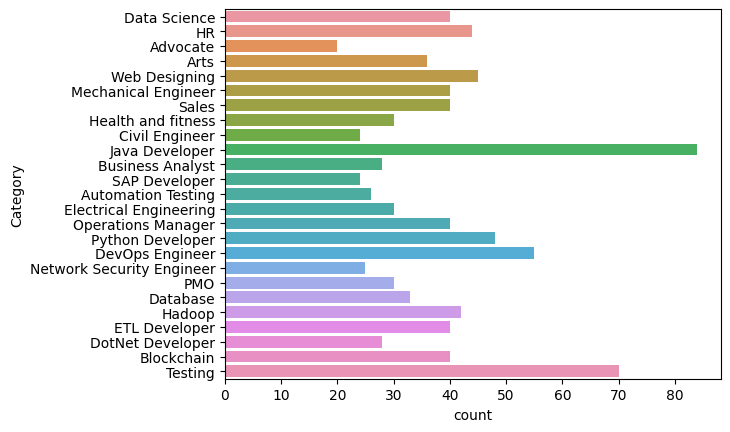

In [ ]:
df = readfunction()
Visulization(df)

In [ ]:
pre_processing(df)
cleanedSentences, wordfreqdist = mostcommon_words(df)

Before Pre-Processing
++++++++++++++++++++++++++++++++++++++++++++++++++
0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object
══════════════════════════════════════════════════
After Pre-Processing
++++++++++++++++++++++++++++++++++++++++++++++++++
0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Intere

══════════════════════════════════════════════════
Visulization of most common word: 
══════════════════════════════════════════════════


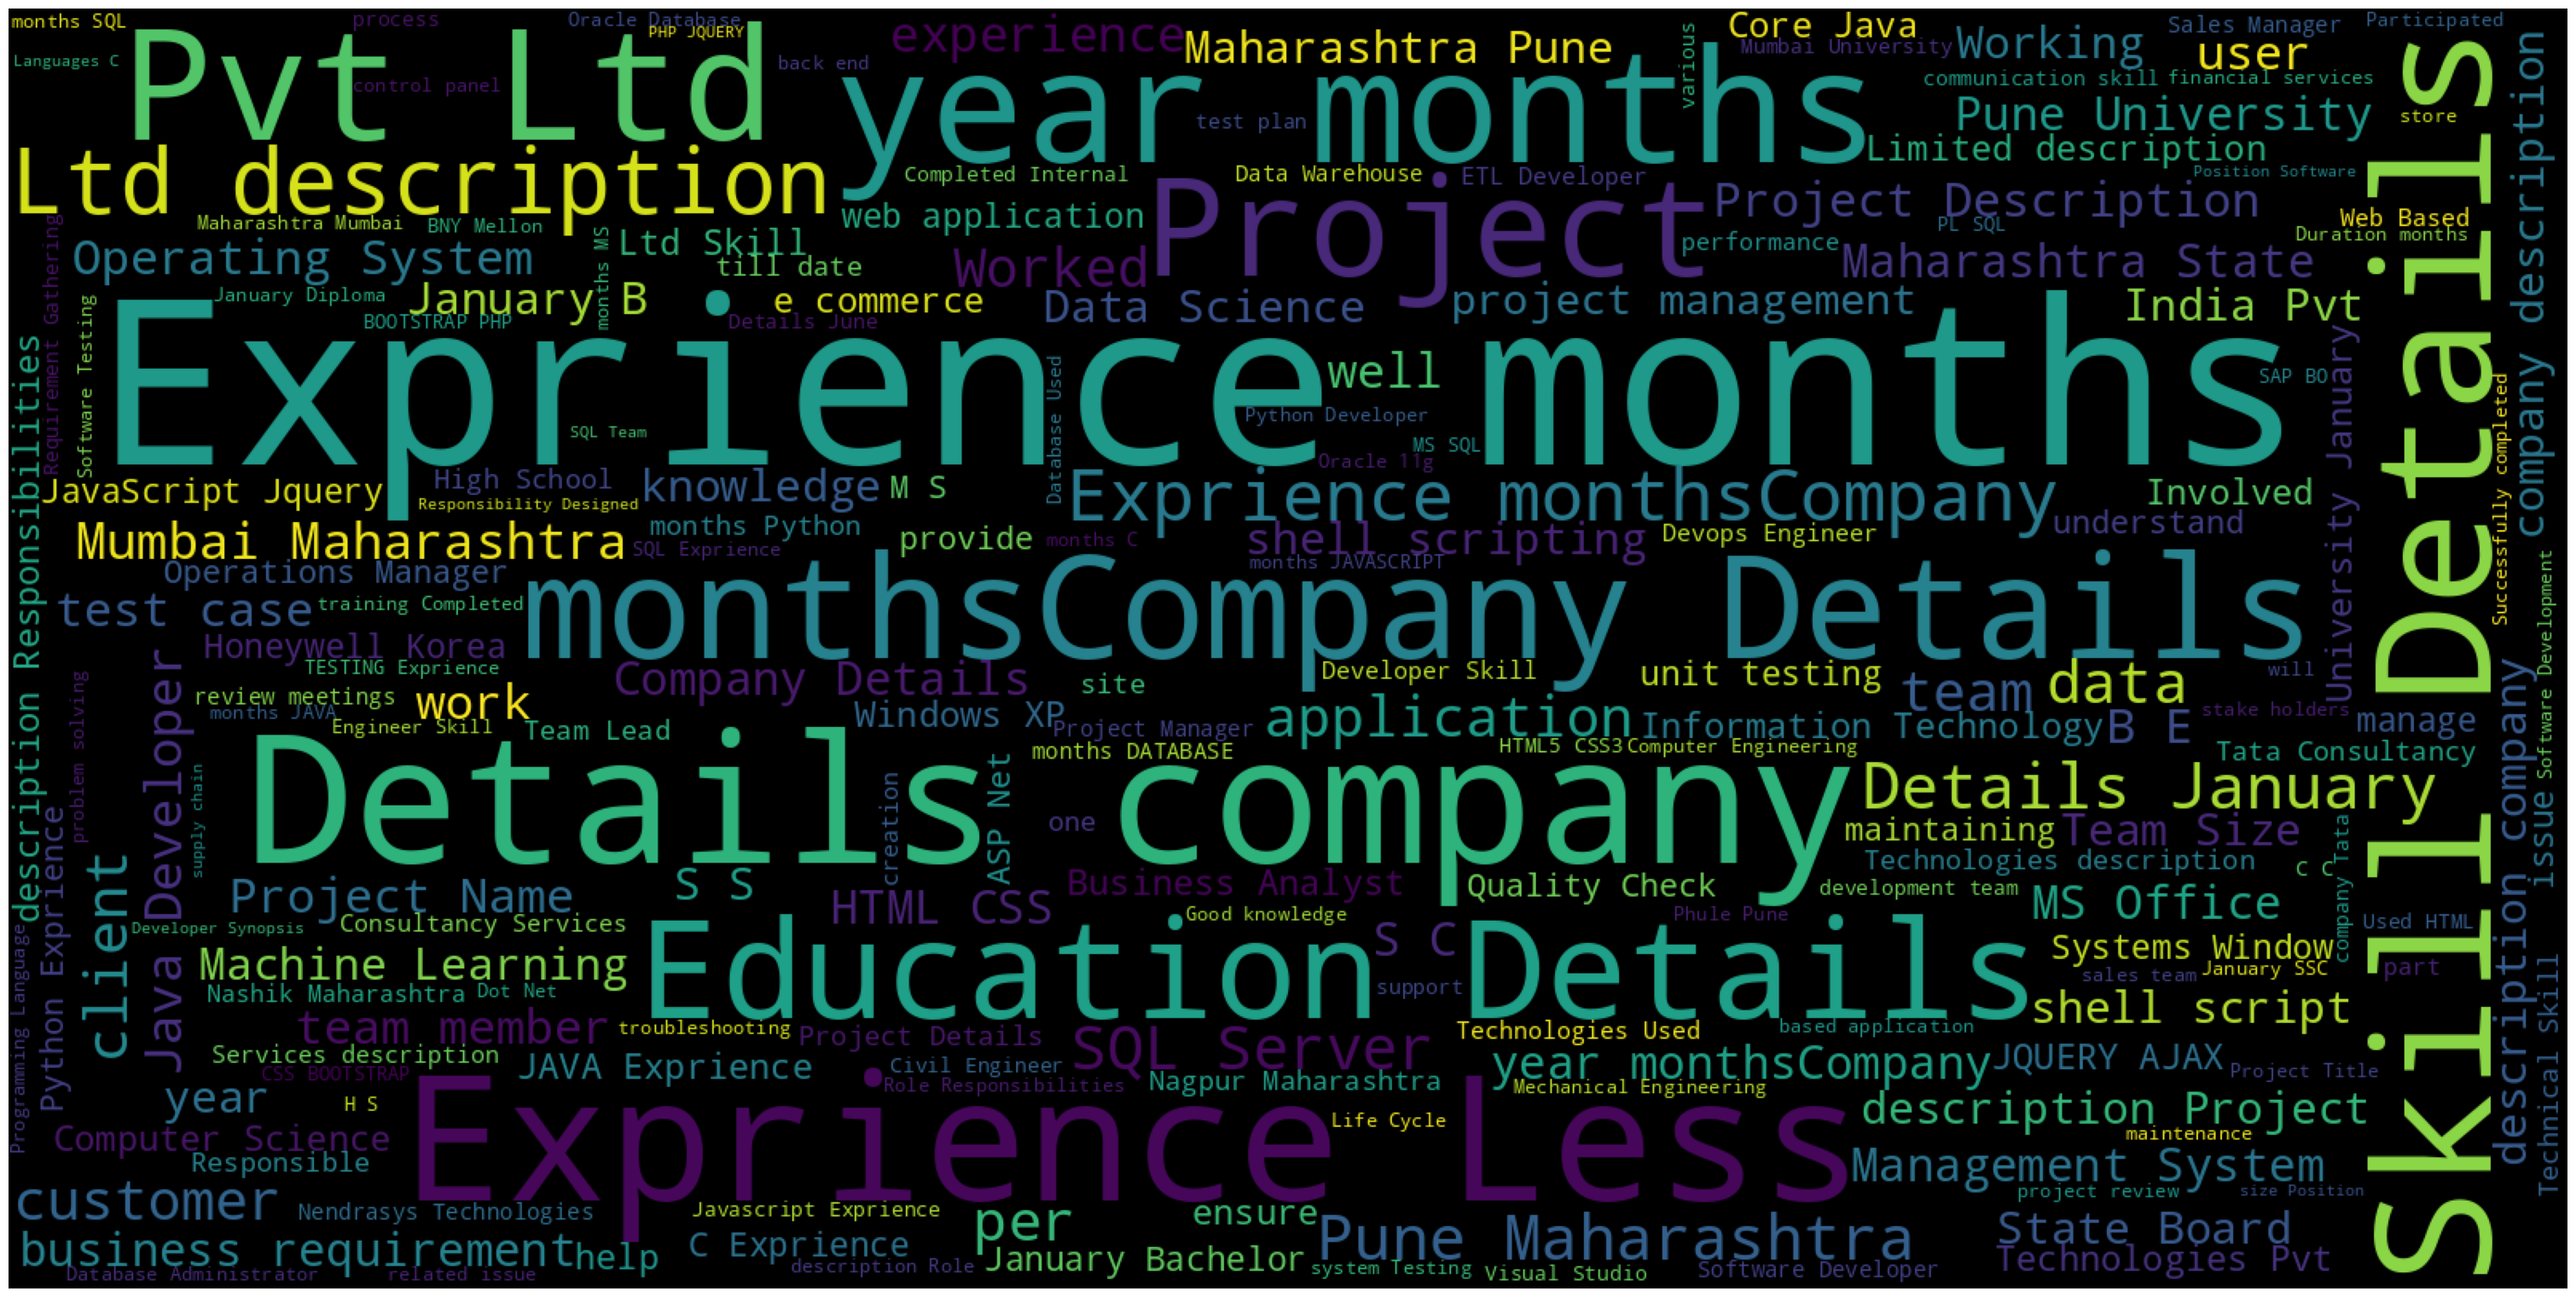

In [ ]:
wordcloud(cleanedSentences)

In [ ]:
features, label = get_festures_Labels(df)

══════════════════════════════════════════════════
Get features and labels from data: 
++++++++++++++++++++++++++++++++++++++++++++++++++
Features: 

Technical Summary Knowledge of Informatica Power Center ver 9 1 and 10 ETL Tool Mapping designing usage of multiple transformations Integration of various data source like SQL Server tables Flat Files etc into target data warehouse SQL PLSQL working knowledge on Microsoft SQL server 2010 Unix Work Description shell scripting error debugging Job scheduling using Autosys Incident management and Change Requests through Service Now JIRA Agile Central Basic knowledge of Intellimatch Reconciliation tool Education Details January 2010 to January 2014 BTech CSE Sangli Maharashtra Walchand College of Engineering October 2009 H S C Sangli Maharashtra Willingdon College August 2007 S S C Achievements Sangli Maharashtra Martin s English School ETL Developer IT Analyst Skill Details ETL Exprience 48 months EXTRACT TRANSFORM AND LOAD Exprience 48 month

In [ ]:
train_features, train_labels, test_features, test_labels = spliting_data(df,features, label)
train_feature_sequences, test_feature_sequences, feature_tokenizer = tokenizing()
train_label_sequences, test_label_sequences, label_index = Tokenize_label()
train_feature_padded, test_feature_padded = pad_sequence(train_feature_sequences, test_feature_sequences)
train_feature_padded, test_feature_padded = genetaing_trainig_dataset(train_feature_padded, test_feature_padded)
train_label_sequences, test_label_sequences = genetaing_validation_dataset(train_label_sequences, test_label_sequences)

══════════════════════════════════════════════════
Sliting data In process
++++++++++++++++++++++++++++++++++++++++++++++++++
Sliting data successfully completed
train_features, train_labels, test_features, test_labels suceffuly generated
══════════════════════════════════════════════════
══════════════════════════════════════════════════
Tokenize part has started
++++++++++++++++++++++++++++++++++++++++++++++++++
Tokenize part has completed
══════════════════════════════════════════════════
{'javadeveloper': 1, 'testing': 2, 'devopsengineer': 3, 'pythondeveloper': 4, 'webdesigning': 5, 'hr': 6, 'hadoop': 7, 'etldeveloper': 8, 'datascience': 9, 'operationsmanager': 10, 'mechanicalengineer': 11, 'sales': 12, 'blockchain': 13, 'arts': 14, 'database': 15, 'healthandfitness': 16, 'electricalengineering': 17, 'pmo': 18, 'dotnetdeveloper': 19, 'businessanalyst': 20, 'automationtesting': 21, 'networksecurityengineer': 22, 'civilengineer': 23, 'sapdeveloper': 24, 'advocate': 25}
══════════════

In [ ]:
model_building()
model = optimization()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 64)             384000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 26)                1690      
                                                                 
Total params: 459,994
Trainable params: 459,994
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_compliation(train_feature_padded, test_feature_padded,train_label_sequences, test_label_sequences, model)


══════════════════════════════════════════════════
Model compilation has started
Epoch 1/200
25/25 - 17s - loss: 3.2152 - accuracy: 0.1378 - val_loss: 3.0869 - val_accuracy: 0.1606 - 17s/epoch - 665ms/step
Epoch 2/200
25/25 - 8s - loss: 2.9037 - accuracy: 0.2120 - val_loss: 2.6279 - val_accuracy: 0.3990 - 8s/epoch - 324ms/step
Epoch 3/200
25/25 - 10s - loss: 2.3448 - accuracy: 0.3602 - val_loss: 1.9539 - val_accuracy: 0.4560 - 10s/epoch - 401ms/step
Epoch 4/200
25/25 - 10s - loss: 1.7816 - accuracy: 0.4967 - val_loss: 1.7125 - val_accuracy: 0.4301 - 10s/epoch - 406ms/step
Epoch 5/200
25/25 - 9s - loss: 1.3242 - accuracy: 0.6567 - val_loss: 1.1089 - val_accuracy: 0.7409 - 9s/epoch - 353ms/step
Epoch 6/200
25/25 - 10s - loss: 0.8846 - accuracy: 0.7815 - val_loss: 0.6878 - val_accuracy: 0.8860 - 10s/epoch - 401ms/step
Epoch 7/200
25/25 - 10s - loss: 0.6303 - accuracy: 0.8700 - val_loss: 0.5274 - val_accuracy: 0.9016 - 10s/epoch - 406ms/step
Epoch 8/200
25/25 - 8s - loss: 0.6647 - accuracy

══════════════════════════════════════════════════
7/7 [==============================] - 1s 114ms/step - loss: 6.8447e-05 - accuracy: 1.0000
++++++++++++++++++++++++++++++++++++++++++++++++++
Test Score: 6.844701420050114e-05
Test Accuracy: 1.0
══════════════════════════════════════════════════


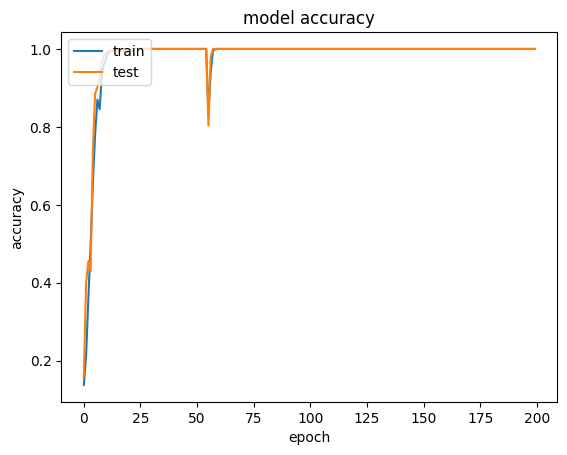

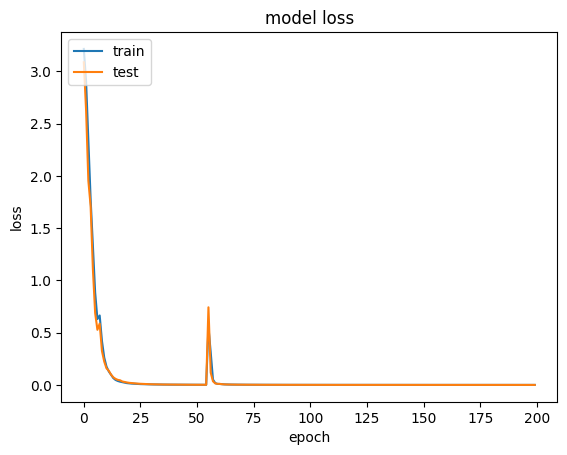

In [ ]:
get_accuracy()
graphs(history)


In [ ]:
pridection()

1/1 [==============================] - 0s 56ms/step
++++++++++++++++++++++++++++++++++++++++++++++++++
['hadoop', 'networksecurityengineer', 'webdesigning']


In [ ]:
# Save the trained model
model.save("data/model.h5")

In [ ]:
model1 = tf.keras.models.load_model("data/model.h5")

In [ ]:
to_predict = [test_feature_padded[3],test_feature_padded[8],test_feature_padded[17]]
predictions = model1.predict(np.array(to_predict))
class_labels = np.argmax(predictions, axis=1)
print_add()
keys = [key for i in class_labels for key, value in label_index.items() if i == value]
print(keys)

1/1 [==============================] - 1s 821ms/step
++++++++++++++++++++++++++++++++++++++++++++++++++
['hadoop', 'networksecurityengineer', 'webdesigning']


In [ ]:
test_data = pd.read_csv("data/resumes_indeed_com-job_deduped_n_merged_20190401_091428862184012.csv", encoding='latin1')

In [ ]:
test_data.shape

(16019, 29)

In [ ]:
test_data.head()

Uniq Id            Crawl Timestamp  \
0  3ddb29e616f31947053b257f327969d7  2019-02-20 08:47:25 +0000   
1  9138476c76bcbbefadedd4862966c3d2  2019-02-20 07:47:48 +0000   
2  cd1cafa706f917a627982bf47291b888  2019-02-20 07:37:41 +0000   
3  53aea69598c6c1084e4bce89f0494bc3  2019-02-20 08:20:06 +0000   
4  90f8f99d66ebc6c09fceee37aff14bc1  2019-02-20 08:35:33 +0000   

                                      Resume Title        Location  \
0                                    Sales Manager  New London, NH   
1                          Implementation Engineer   Worcester, MA   
2  Education Information Dissemination Coordinator     Bristol, NH   
3                    Engineering Department Intern   Billerica, MA   
4                    Pack and Ship/SORT Technician   Worcester, MA   

                                        Introduction  \
0  Dynamic technical sales professional with dive...   
1  Experienced, dependable and motivated IT Techn...   
2                                                NaN   
3  To obtain full time employment in the field of...   
4                                                NaN   

                                     Work Experience  \
0  Sales Manager-MadgeTech, Inc-August 2015 to Fe...   
1  Implementation Engineer-Versatile Communicatio...   
2  Education Information Dissemination Coordinato...   
3  Engineering Department Intern-Town of Billeric...   
4  Pack and Ship/SORT Technician-Intel Corporatio...   

                                           Education  \
0  B.A.-History-Franklin Pierce University-Rindge...   
1  --ShoreTel University-Austin, TX|Master-PC & N...   
2     Bachelor's-Management-Regis College-Weston, MA   
3  Bachelor of Science-Civil and Environmental En...   
4  BS-Information Technology-University of Massac...   

                                              Skills  \
0  120 months-CRM,72 months-Contract Negotiation,...   
1  15 months-CISCO,12 months-FIBER OPTIC,6 months...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                              Additional Information  Unnamed: 9  ...  \
0  â¢    Well-Developed Sales & Business Acumen ...         NaN  ...   
1  TECHNICAL SKILLS\n\nHardware: Switches, Router...         NaN  ...   
2                                                NaN         NaN  ...   
3  â¢ Bachelors of Science in Civil and Environm...         NaN  ...   
4  Engineering Technician/Planning Analyst/Operat...         NaN  ...   

   Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 24  Unnamed: 25  Unnamed: 26  Unnamed: 27  Unnamed: 28  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 29 columns]

In [ ]:
test_data = test_data.drop(test_data.columns[:2], axis=1)
test_data = test_data.drop(test_data.columns[7:], axis=1)
test_data['merged_col'] = test_data.iloc[:, 1:7].apply(lambda x: "\n".join(x.dropna().astype(str)), axis=1)

In [ ]:
test_data.columns

Index(['Resume Title', 'Location', 'Introduction', 'Work Experience',
       'Education', 'Skills', 'Additional Information', 'merged_col'],
      dtype='object')

In [ ]:
test_data.iloc[0,:]

Resume Title                                                  Sales Manager
Location                                                     New London, NH
Introduction              Dynamic technical sales professional with dive...
Work Experience           Sales Manager-MadgeTech, Inc-August 2015 to Fe...
Education                 B.A.-History-Franklin Pierce University-Rindge...
Skills                    120 months-CRM,72 months-Contract Negotiation,...
Additional Information    â¢    Well-Developed Sales & Business Acumen ...
merged_col                New London, NH\nDynamic technical sales profes...
Name: 0, dtype: object

In [ ]:
print(test_data.iloc[0,7])

New London, NH
Dynamic technical sales professional with diverse skill set and progressive career in complex hardware
solutions. Experience encompasses B2B & channel sales management, product development, team
building, public speaking and operations. Proven ability to organize and manage in a fast-paced team
environment. Refined business acumen, and capable of critical thinking and problem solving in real-time.
Energetic and well-rounded with exceptional inter-personal skills.
Sales Manager-MadgeTech, Inc-August 2015 to February 2017-Warner, NH-â¢       Built and Directed inside sales team offering solution-based data logging hardware, software, and services to customers across multiple vertical markets

â¢       Directed personnel in support of global channel partner network

â¢       15% Sales Growth from 2015 to 2017: $8.5M to $9.7M (Combined channel and direct)

â¢       Managed expansive product portfolio

â¢       Developed, implemented, and tracked strategic sales plans to

In [ ]:
new_test = test_data.loc[:,['Resume Title', 'merged_col']]

In [ ]:
new_test.head()

Resume Title  \
0                                    Sales Manager   
1                          Implementation Engineer   
2  Education Information Dissemination Coordinator   
3                    Engineering Department Intern   
4                    Pack and Ship/SORT Technician   

                                          merged_col  
0  New London, NH\nDynamic technical sales profes...  
1  Worcester, MA\nExperienced, dependable and mot...  
2  Bristol, NH\nEducation Information Disseminati...  
3  Billerica, MA\nTo obtain full time employment ...  
4  Worcester, MA\nPack and Ship/SORT Technician-I...

In [ ]:
new_test['cleaned_resume'] = new_test.merged_col.apply(lambda x: cleanResume(x))
new_test.head()

Resume Title  \
0                                    Sales Manager   
1                          Implementation Engineer   
2  Education Information Dissemination Coordinator   
3                    Engineering Department Intern   
4                    Pack and Ship/SORT Technician   

                                          merged_col  \
0  New London, NH\nDynamic technical sales profes...   
1  Worcester, MA\nExperienced, dependable and mot...   
2  Bristol, NH\nEducation Information Disseminati...   
3  Billerica, MA\nTo obtain full time employment ...   
4  Worcester, MA\nPack and Ship/SORT Technician-I...   

                                      cleaned_resume  
0  New London NH Dynamic technical sales professi...  
1  Worcester MA Experienced dependable and motiva...  
2  Bristol NH Education Information Dissemination...  
3  Billerica MA To obtain full time employment in...  
4  Worcester MA Pack and Ship SORT Technician Int...

In [ ]:
cleaned_sent, word_freq = mostcommon_words(new_test)

══════════════════════════════════════════════════
++++++++++++++++++++++++++++++++++++++++++++++++++
Most common words: 

[('months', 46308), ('January', 45234), ('NY', 25673), ('MA', 21990), ('new', 19605), ('New', 19167), ('sales', 18805), ('data', 17928), ('customer', 17865), ('management', 17730), ('0', 17695), ('I', 17655), ('team', 17567), ('using', 16085), ('business', 16022), ('Manager', 14897), ('including', 14773), ('Present', 14519), ('Management', 14025), ('2015', 13727), ('service', 13679), ('2016', 13480), ('University', 13027), ('2014', 12662), ('York', 12415), ('NJ', 12289), ('June', 12132), ('August', 12084), ('2017', 11935), ('development', 11898), ('2013', 11674), ('support', 11601), ('skills', 11476), ('May', 11444), ('customers', 11269), ('work', 11185), ('2012', 11127), ('September', 11043), ('system', 10966), ('company', 10736), ('Business', 10706), ('Sales', 10634), ('Responsible', 10502), ('project', 10450), ('CT', 10413), ('marketing', 10338), ('product', 102

In [ ]:
new_test.rename(columns={'Resume Title': 'Category'}, inplace = True)

══════════════════════════════════════════════════
Visulization of most common word: 
══════════════════════════════════════════════════


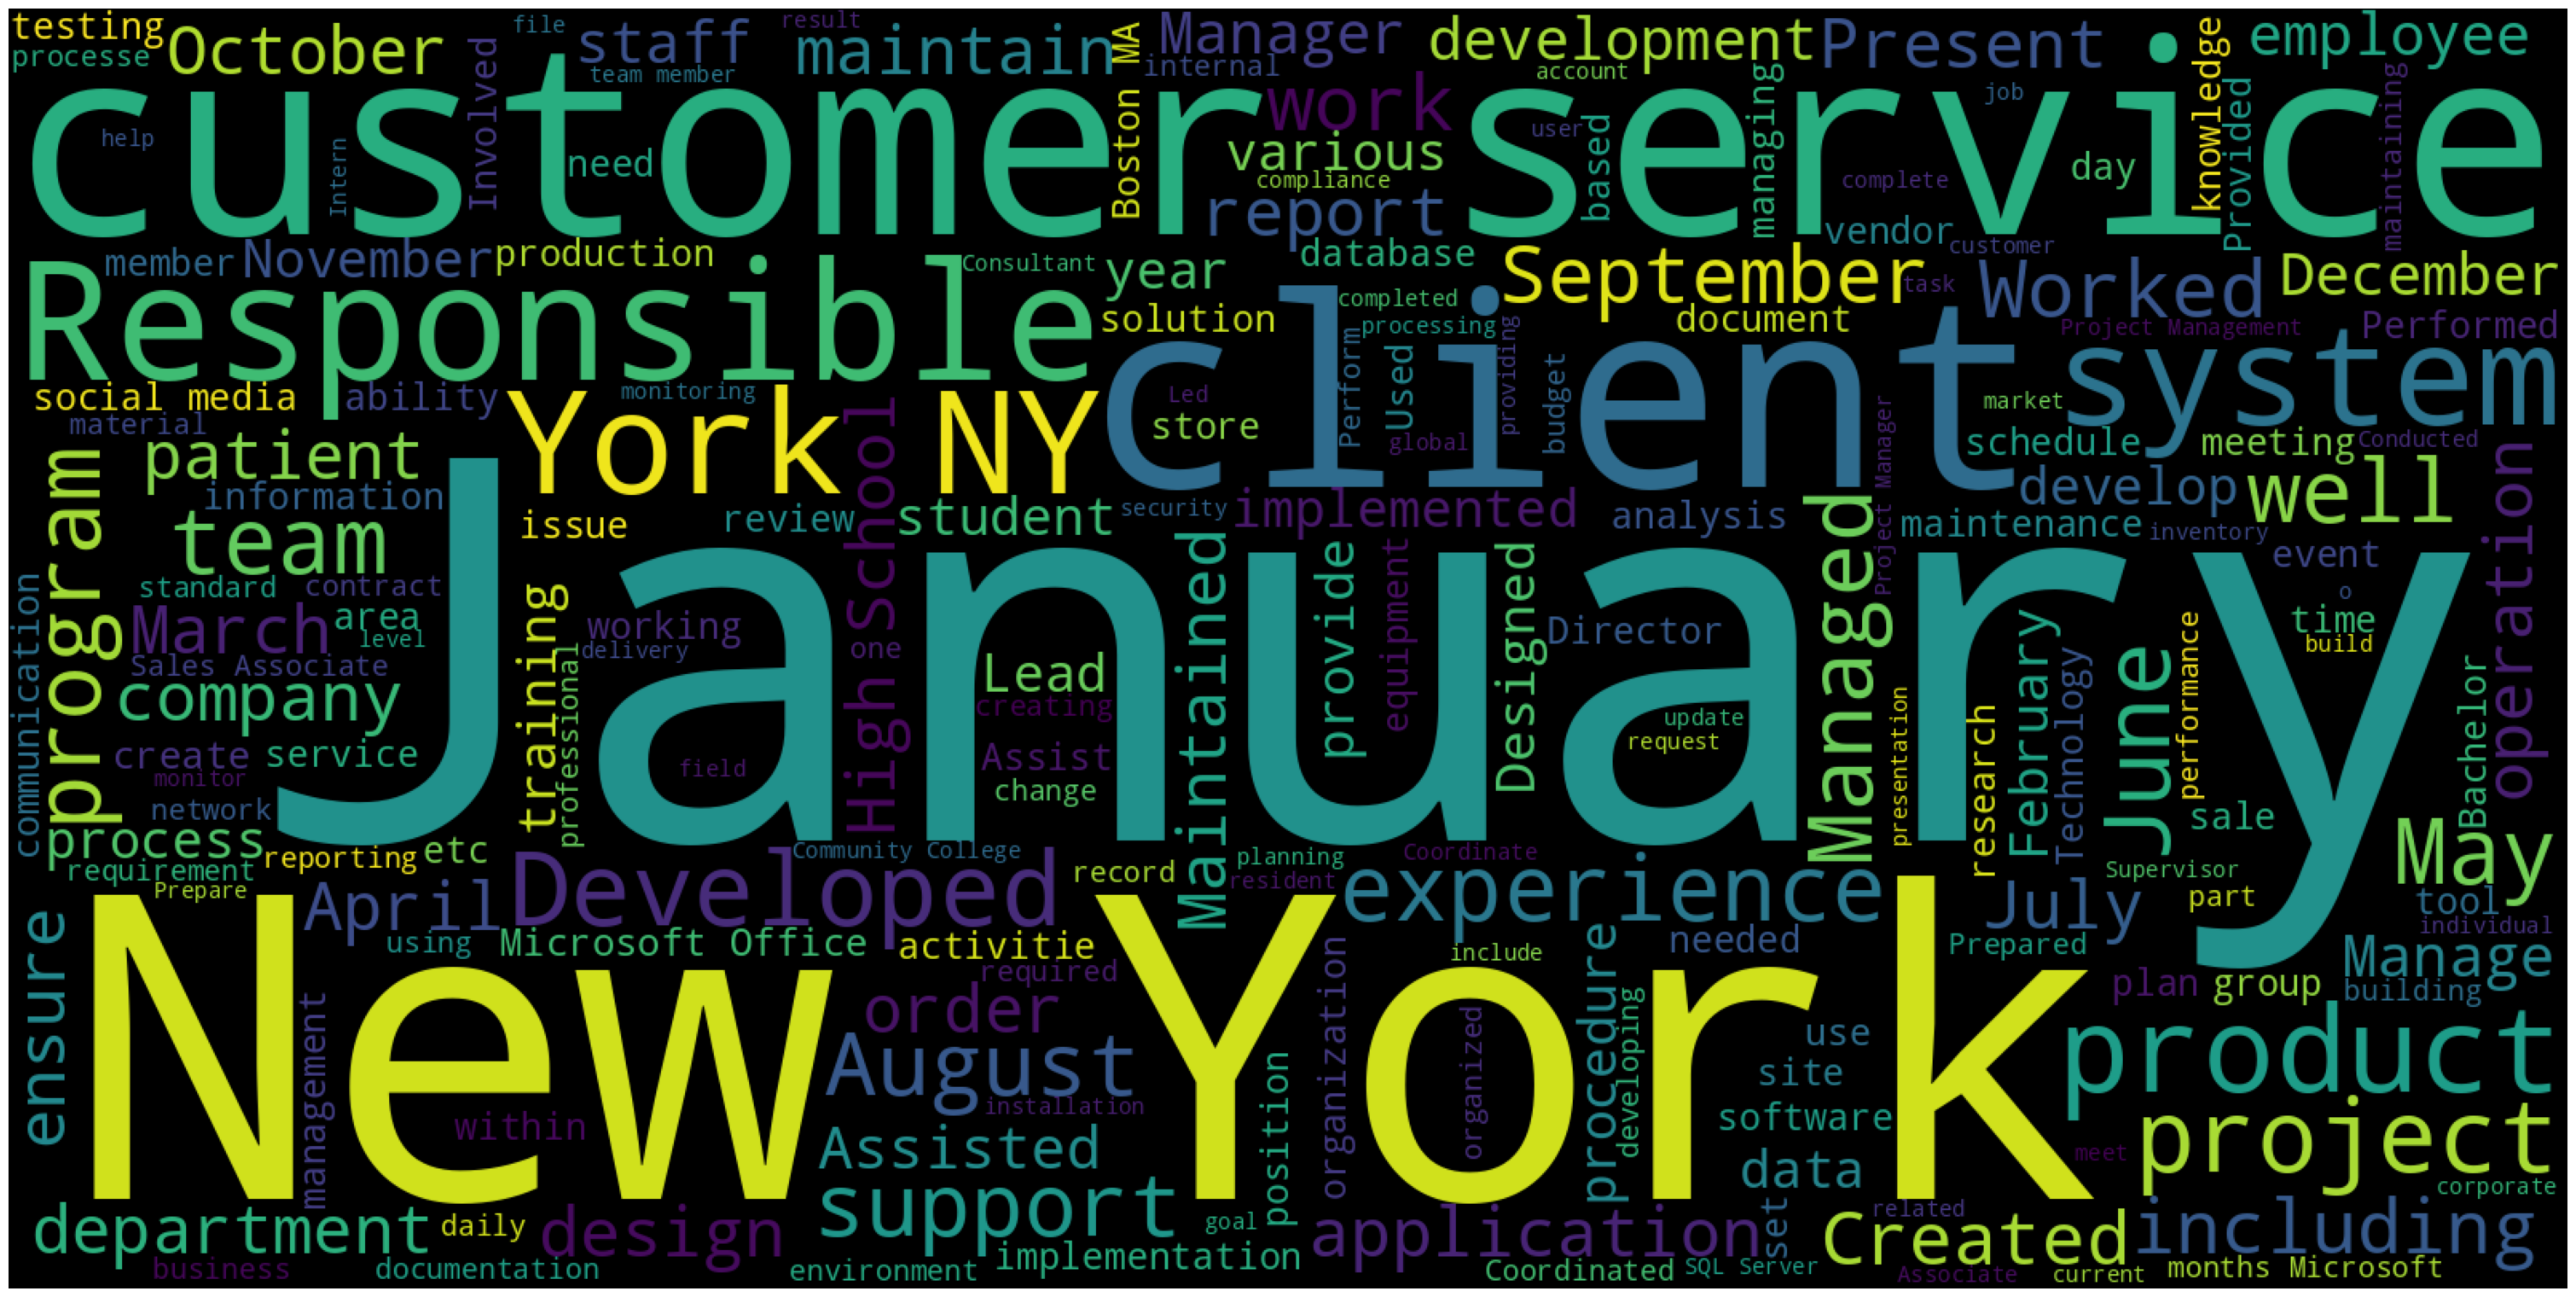

In [ ]:
wordcloud(cleaned_sent)

In [ ]:
features, label = get_festures_Labels(new_test)

══════════════════════════════════════════════════
Get features and labels from data: 
++++++++++++++++++++++++++++++++++++++++++++++++++
Features: 

Plymouth MA I write to you in response of you ad As a highly competent Customer Service manager within a accounting department with experience in a variety of different buissness I would bring a dedicated reliable and driven attitude to this role My experience aligns with the qualifications you are seeking I maintain a exceeding functional work environment while delivering exceptional customer service I have experience working with a large company in the accounting department with experience in different areas I understand the necessity of accuracy and process I am experienced in the areas of reconciliations analysis accounting reporting and general accounting duties i am highly functional and versatile in my job role I have a creative skill for problem solving and work well independently and with little oversight I respond to request fro

In [ ]:
test_features, test_labels = features, label

In [ ]:
test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

In [ ]:
max_length = 300
trunc_type = 'post'
pad_type = 'post'

test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = np.array(test_feature_padded)


In [ ]:
predictions = model.predict(test_feature_padded)

501/501 [==============================] - 41s 82ms/step


In [ ]:
class_labels = np.argmax(predictions, axis=1)

In [ ]:
keys = [key for i in class_labels for key, value in label_index.items() if i == value]

In [ ]:
len(keys)

16019

In [ ]:
new_test.head()

Category  \
0                                  salesmanager   
1                        implementationengineer   
2  educationinformationdisseminationcoordinator   
3                   engineeringdepartmentintern   
4                    packandship/sorttechnician   

                                          merged_col  \
0  New London, NH\nDynamic technical sales profes...   
1  Worcester, MA\nExperienced, dependable and mot...   
2  Bristol, NH\nEducation Information Disseminati...   
3  Billerica, MA\nTo obtain full time employment ...   
4  Worcester, MA\nPack and Ship/SORT Technician-I...   

                                      cleaned_resume  
0  New London NH Dynamic technical sales professi...  
1  Worcester MA Experienced dependable and motiva...  
2  Bristol NH Education Information Dissemination...  
3  Billerica MA To obtain full time employment in...  
4  Worcester MA Pack and Ship SORT Technician Int...

In [ ]:
new_test["prediction"] = keys

In [ ]:
new_test.head(25)

Category  \
0                                       salesmanager   
1                             implementationengineer   
2       educationinformationdisseminationcoordinator   
3                        engineeringdepartmentintern   
4                         packandship/sorttechnician   
5                                     bdcdataanalyst   
6                               safetyengineerintern   
7                               classifiedadsmanager   
8                            assistantprogrammanager   
9                           technicalcustomerservice   
10                                  intakespecialist   
11                                           drafter   
12                           project/productengineer   
13                              staffprocessengineer   
14                         manufacturingtestengineer   
15                         assistantsoftwareengineer   
16                            seniorplatformengineer   
17                                supervisorbackroom   
18  programmanager,enterpriseprogrammanagementoffice   
19                                  softwareengineer   
20                            homehealthcareprovider   
21                               saleslead/keyholder   
22                             seniorprojectengineer   
23                                   graphicdesigner   
24                                electricalengineer   

                                           merged_col  \
0   New London, NH\nDynamic technical sales profes...   
1   Worcester, MA\nExperienced, dependable and mot...   
2   Bristol, NH\nEducation Information Disseminati...   
3   Billerica, MA\nTo obtain full time employment ...   
4   Worcester, MA\nPack and Ship/SORT Technician-I...   
5   Springfield, MA\nBDC Data Analyst-Gary Rome Au...   
6   Boston, MA\nSafety Engineer Intern-Hexagon Man...   
7   Allenstown, NH\nTo utilize experience and pers...   
8   Pembroke, NH\nASSISTANT PROGRAM MANAGER-HARBOR...   
9   Plymouth, MA\nHigh energy, hardworking Enginee...   
10  Springfield, MA\nHighly-motived, hard-working,...   
11  Wilbraham, MA\nDrafter-Spath & Son, Inc-Novemb...   
12  Concord, NH\nA project engineer with over 20 y...   
13  Wilbraham, MA\nA highly skilled, self motivate...   
14  Harvard, MA\nHighly-motivated, process-oriente...   
15  Waltham, MA\nAssistant Software Engineer-Coope...   
16  Shrewsbury, MA\nSoftware Engineer with 5+ year...   
17  New Bedford, MA\nSupervisor backroom-Wal-Mart-...   
18  Concord, NH\nProgram Manager, Enterprise Progr...   
19  Boston, MA\nSoftware Engineer-Pillar Bioscienc...   
20  Plymouth, MA\nTo contribute to a high- energy ...   
21  New Bedford, MA\nSales Lead/Key Holder-Frances...   
22  Quincy, MA\nâ¢ Possess 8 years of IT experien...   
23  Chesterfield, MA\nGraphic designer based in We...   
24  Boxborough, MA\nElectrical Engineer-Olympus Sc...   

                                       cleaned_resume          prediction  
0   New London NH Dynamic technical sales professi...        sapdeveloper  
1   Worcester MA Experienced dependable and motiva...     pythondeveloper  
2   Bristol NH Education Information Dissemination...       javadeveloper  
3   Billerica MA To obtain full time employment in...       javadeveloper  
4   Worcester MA Pack and Ship SORT Technician Int...  mechanicalengineer  
5   Springfield MA BDC Data Analyst Gary Rome Auto...  mechanicalengineer  
6   Boston MA Safety Engineer Intern Hexagon Manuf...        sapdeveloper  
7   Allenstown NH To utilize experience and person...        sapdeveloper  
8   Pembroke NH ASSISTANT PROGRAM MANAGER HARBOR H...       javadeveloper  
9   Plymouth MA High energy hardworking Engineerin...        sapdeveloper  
10  Springfield MA Highly motived hard working and...  mechanicalengineer  
11  Wilbraham MA Drafter Spath Son Inc November 20...            advocate  
12  Concord NH A project engineer with over 20 yea...            database  
13  Wilbraham MA A highly skilled self m

Category                                         merged_col  \
349    mechanicalengineer  North Falmouth, MA\nLeveraging hands-on field ...   
452    mechanicalengineer  Malden, MA\nMechanical Design Engineer interes...   
1049   mechanicalengineer  Boston, MA\nMechanical Engineer-Emphysys, Inc-...   
1459   mechanicalengineer  Seeking employment as a mechanical engineer.\n...   
1544   mechanicalengineer  Norwich, VT\nMechanical Engineer-Simbex-Novemb...   
1771   mechanicalengineer  Boston, MA\nMechanical Engineer-Institute of O...   
1868   mechanicalengineer  Newton, MA\nI am a mechanical engineer who has...   
5222   mechanicalengineer  Winchester, MA\nHands-on, team oriented, inter...   
5616   mechanicalengineer  Somerville, MA\nMechanical Engineer-Covaris-Ma...   
5725   mechanicalengineer  Lowell, MA\nMechanical Engineer-Progression, I...   
12694       javadeveloper  Elmwood Park, NJ\nJava Developer--October 2016...   
15512     businessanalyst  Fall River, MA\nâ¢ Professional Business Anal...   
15847     businessanalyst  Swanzey, NH\nBusiness Analyst-Peerless Insuran...   

                                          cleaned_resume          prediction  
349    North Falmouth MA Leveraging hands on field ex...  mechanicalengineer  
452    Malden MA Mechanical Design Engineer intereste...  mechanicalengineer  
1049   Boston MA Mechanical Engineer Emphysys Inc Jun...  mechanicalengineer  
1459   Seeking employment as a mechanical engineer Me...  mechanicalengineer  
1544   Norwich VT Mechanical Engineer Simbex November...  mechanicalengineer  
1771   Boston MA Mechanical Engineer Institute of Ort...  mechanicalengineer  
1868   Newton MA I am a mechanical engineer who has d...  mechanicalengineer  
5222   Winchester MA Hands on team oriented internati...  mechanicalengineer  
5616   Somerville MA Mechanical Engineer Covaris May ...  mechanicalengineer  
5725   Lowell MA Mechanical Engineer Progression Inc ...  mechanicalengineer  
12694  Elmwood Park NJ Java Developer October 2016 to...       javadeveloper  
15512  Fall River MA Professional Business Analyst wi...     businessanalyst  
15847  Swanzey NH Business Analyst Peerless Insurance...     businessanalyst

In [ ]:
# new_test[new_test["Category"] == new_test["prediction"]]
# _cat = new_test["Category"].unique()
# _pred = new_test["prediction"].unique()